<h1 align="center"> $\color{black}{\text{Lion king movie sentiment analysis }}$ </h1>
<img src="lion.jpeg">


# 1. Import required libraries

In [1]:
import numpy as np
# to create N-dimensional array object
import pandas as pd
#  to use data structures and data analysis tool for high performance
import matplotlib.pyplot as plt
# 2D ploting library for quality figures
import gensim 
# for topic modelling, document indexing and similarity retrieval with large corpora.
import random
#implements pseudo-random number generators for various distributions.
import warnings
# alert the user for some conditions
import seaborn as sns
# high level interface for drawing attractive and informative statistical graphics
from nltk.stem.porter import PorterStemmer
#Stemmers remove morphological affixes from words, leaving only the word stem.
import string
import nltk
#NLTK is a leading platform for building Python programs to work with human language data. 
import re
from nltk.corpus import stopwords
# To import the english stopwords from the nltk library to clean text
from wordcloud import WordCloud, STOPWORDS
# to plot the visual representation of the test data
from matplotlib.pyplot import figure
# to construct the figure 
from sklearn.feature_extraction.text import TfidfVectorizer
# To Transform a count matrix to a normalized tf or tf-idf representation
from sklearn.pipeline import Pipeline
# To Construct a Pipeline from the given estimators.
from sklearn.model_selection import GridSearchCV
#grid search cv which helps to get right parameter
from sklearn.linear_model import SGDClassifier
#the schostic gradient descent classifer used in this analysis
from sklearn.model_selection import train_test_split
# to divide the required train and test data above tran_test_split is imported
from sklearn import metrics
# the above code to import the metrics to check performance of the model
from collections import Counter
# to count the words in the data
stop = set(stopwords.words('english'))
# the word which wont be usefull in the analysis
snow = nltk.stem.SnowballStemmer('english')
# to get the root word with same meaning like which have different tense
warnings.filterwarnings("ignore")
# the above command to avoid warning 
%matplotlib inline
# to magic function display the plots in the output

C:\Users\Dhanajayan\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# 2. Load Dataset

In [2]:
# pandas library is used to read the csv file which contains data
df = pd.read_csv('lion_king_review.csv')

In [3]:
# To check sample 5 rows of data 
#df.head()
df.tail()

,Review,Reviewer_id,Date_of_review,Rating
3505,"Great movie, great memories!",3d8cd732-fdaf-40e1-88ff-3d84c24452fc,2019-08-01T17:49:26.215Z,5.0
3506,It was amazing. Such a great job staying true ...,624447d2-af98-4383-a5ea-900b814089f5,2019-08-01T17:25:15.202Z,5.0
3507,absolutely incredible effects! a must see expe...,970259554,2019-08-01T17:23:38.094Z,5.0
3508,I felt it was very similar to the original. Go...,D5E343C1-E507-4528-8A06-FD2EC319908E,2019-08-01T17:23:20.923Z,5.0
3509,"Timon and Pumbaa made the movie, otherwise, th...",ea09d06f-1c73-46f8-884e-e6f98a798db2,2019-08-01T17:21:16.846Z,1.0


In [4]:
# To check the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 4 columns):
Review            3510 non-null object
Reviewer_id       3510 non-null object
Date_of_review    3510 non-null object
Rating            3510 non-null float64
dtypes: float64(1), object(3)
memory usage: 109.8+ KB


In [5]:
# To check shape of the dataset
df.shape

(3510, 4)

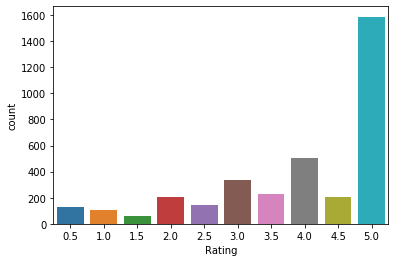

In [6]:
# to plot rating values
count_plot = sns.countplot(x="Rating", data=df)

In [7]:
# to check how many class inputs are there in dataset
df['Rating'].value_counts()

5.0    1588
4.0     506
3.0     339
3.5     232
4.5     207
2.0     202
2.5     144
0.5     125
1.0     109
1.5      58
Name: Rating, dtype: int64

In [8]:
# 0-positive and 1- negative
# to convert rating into polarity
def extract(n):
    if n > 3:
        return 0
    return 1

Target = df['Rating']

pos_Neg = Target.map(extract)

df['Target'] = pos_Neg

In [9]:
# to check the Target colunm
df.head()

,Review,Reviewer_id,Date_of_review,Rating,Target
0,Beautiful remake of a classic!,B31A73BF-FE89-414C-B83B-467170B1E31D,2019-08-21T22:20:27.426Z,5.0,0
1,I thought it was a great modern adaptation of ...,978207354,2019-08-21T21:56:33.036Z,3.5,0
2,It’s was ok I was expecting more,974999729,2019-08-21T21:45:50.134Z,3.0,1
3,Awesome movie. I noticed there were alot of d...,DF955006-76DE-4A1E-A192-5F4B7D18110C,2019-08-21T20:59:45.201Z,5.0,0
4,The emotional expressions within the 2019 rema...,978207710,2019-08-21T20:17:23.239Z,1.5,1


In [10]:
# sort the data before dedupliation
df= df.sort_values('Reviewer_id', axis = 0, ascending = True )

In [11]:
# to check sorted values
df.head()

,Review,Reviewer_id,Date_of_review,Rating,Target
421,I loved Lion King! I’m going to go see it agai...,00404EBE-FE24-434E-A6F7-B0C233FD45E9,2019-08-16T04:46:02.467Z,5.0,0
2978,Wasn’t impressed. I like the original better.,0091A507-56AA-4FA7-B5D7-C0F660103AC1,2019-08-03T18:20:24.616Z,2.0,1
2757,It looked so real and kept to the original sto...,00971579-0c4b-4eac-888d-0d9c89393273,2019-08-04T13:26:27.738Z,5.0,0
46,I hated the fighting and the hyenas having a d...,00A375DE-7942-47DD-9FE1-CF80C504B8A4,2019-08-20T23:36:45.897Z,4.0,0
1318,They copied frame-by-frame where it wasn’t nec...,00B5A162-9945-403F-8E2B-A52A3C4E528E,2019-08-08T22:11:05.126Z,1.5,1


In [12]:
# if any null values in the data will be removed by the following code
new_data = df.dropna(axis = 0, how ='any') 

In [13]:
# to verify the shape of the train data set
new_data.shape

(3510, 5)

In [14]:
# the below code will help to remove the duplicate entries in the dataframe
new_data = new_data.drop_duplicates(subset={"Reviewer_id","Review"},keep="first")

In [15]:
# to check cleaned shape of the data
new_data.shape

(3180, 5)

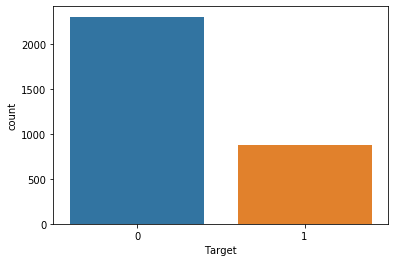

In [16]:
# the count plot which is plotted using seaborn to check the class distribution
count_plot = sns.countplot(x="Target", data=new_data)

##  **Observation** 
By visualizing the above graph most of the reviews are positive and the dataset is imbalanced dataset

In [17]:
# the below code will give the class weight 
new_data['Target'].value_counts()
3034 / (2 * np.bincount(new_data['Target']))

array([0.65756394, 1.73768614])

# 3. Text processing

In [18]:
# function to remove punctuations 
# the following function which remove the puctuation from the input text
def remove_punctuation(text):
    cleaned = re.sub(r'[?|!|\|"|#]', r'' , text)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = ' '.join([w for w in cleaned.split() if len(w)>3])
    return cleaned


In [19]:
# functions to compile emojis
# this function will take review text and compile the emoji pattern and remove 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [20]:
# to clean the text by removing 
i = 0
# to initialize the iteration to zero
string = ' '
# empty string to store cleaned text
cleaned_string = []
# to variable to append the list of cleaned review test
positive_words = []
# the variable to store positive words 
negative_words = []
# the variable to store negative value
text = ''

for sent in new_data['Review'].values:
    filtered_sentence = []
    sent = remove_emoji(sent)
    for w in sent.split():
        for cleaned_words in remove_punctuation(w).split():
            if((cleaned_words.lower() not in stop)):
                text= (snow.stem(cleaned_words.lower())).encode('utf8')
                filtered_sentence.append(text)
                if (new_data['Target'].values)[i] == 0:
                    positive_words.append(text)
                if (new_data['Target'].values)[i] == 1:
                    negative_words.append(text)
                    
            else:
                continue
                
        else:
            continue
            
    string = b" ".join(filtered_sentence)
       
    cleaned_string.append(string)
    i += 1
                


In [21]:
# the below code will create new feature  in the data set 
new_data['Review_cleaned'] = cleaned_string

In [28]:
new_data.head()

,Review,Reviewer_id,Date_of_review,Rating,Target,Review_cleaned
421,I loved Lion King! I’m going to go see it agai...,00404EBE-FE24-434E-A6F7-B0C233FD45E9,2019-08-16T04:46:02.467Z,5.0,0,b'love lion king go take grandson'
2978,Wasn’t impressed. I like the original better.,0091A507-56AA-4FA7-B5D7-C0F660103AC1,2019-08-03T18:20:24.616Z,2.0,1,"b""wasn't impress like origin better"""
2757,It looked so real and kept to the original sto...,00971579-0c4b-4eac-888d-0d9c89393273,2019-08-04T13:26:27.738Z,5.0,0,b'look real kept origin stori dislik wish movi...
46,I hated the fighting and the hyenas having a d...,00A375DE-7942-47DD-9FE1-CF80C504B8A4,2019-08-20T23:36:45.897Z,4.0,0,b'hate fight hyena domin role'
1318,They copied frame-by-frame where it wasn’t nec...,00B5A162-9945-403F-8E2B-A52A3C4E528E,2019-08-08T22:11:05.126Z,1.5,1,"b""copi frame-by-fram wasn't necessari skip par..."


# 4. Vizualisation using Wordcloud

In [23]:
# to check the most frequent positive and negative words

positive = Counter(positive_words)
print("\nMost Common postive words",positive.most_common(20))
negative = Counter(negative_words)
print("\nMost Common negative words",negative.most_common(20))


Most Common postive words [(b'movi', 1136), (b'love', 772), (b'origin', 678), (b'anim', 578), (b'great', 555), (b'like', 433), (b'good', 363), (b'amaz', 275), (b'enjoy', 248), (b'stori', 236), (b'lion', 206), (b'version', 203), (b'realli', 190), (b'king', 189), (b'remak', 189), (b'real', 181), (b'beauti', 176), (b'watch', 171), (b'look', 162), (b'film', 157)]

Most Common negative words [(b'movi', 512), (b'origin', 476), (b'anim', 307), (b'like', 285), (b'voic', 186), (b'good', 169), (b'emot', 168), (b'remak', 161), (b'better', 147), (b'film', 146), (b'lion', 139), (b'charact', 138), (b'watch', 133), (b'king', 118), (b'much', 116), (b'disney', 113), (b'scene', 111), (b'lack', 111), (b'song', 108), (b'great', 106)]


##  Wordcloud
For positive words,negative words and overall words  will show the visual representation of the most frequent word it uses the matplotlib , wordcloud and nltk libraries to display the plot.

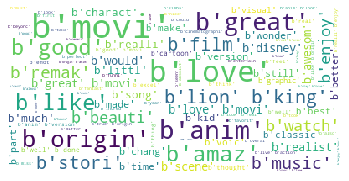

In [24]:
# wordcloud for positive words
stopwords = set(STOPWORDS)
plt.rcParams['font.size']=15               
plt.rcParams['savefig.dpi']=200            
plt.rcParams['figure.subplot.bottom']=.1 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(positive_words))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Positve_word.png", dpi=900)

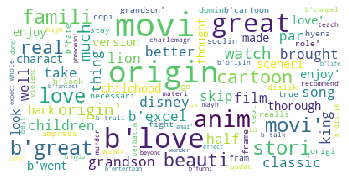

In [25]:
# word cloud for cleaned review
stopwords = set(STOPWORDS)
plt.rcParams['font.size']=15                
plt.rcParams['savefig.dpi']=200           
plt.rcParams['figure.subplot.bottom']=.1 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(new_data['Review_cleaned']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Overall_word.png", dpi=900)

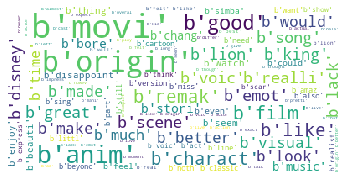

In [26]:
# word cloud for negative words
stopwords = set(STOPWORDS)
plt.rcParams['font.size']=15                
plt.rcParams['savefig.dpi']=200           
plt.rcParams['figure.subplot.bottom']=.1 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(negative_words))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("negative_review.png", dpi=800)

# Model 

In [30]:
X = new_data['Review_cleaned']
y = new_data['Target']

In [67]:
# to split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

In [73]:
# to create a pipe line for grid search 
# the classification used is stochostic gradient decent classifier and the tfidf vectorizer are used in pipeline
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier(class_weight={0:0.67935513, 1:1.89388265}))])


In [74]:
# the n gram parameter are used for hyperparameter tuning
parameters = {
    'vect__ngram_range': [(1, 2), (1, 2)],
}
# to fit the model for training
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                     

In [75]:
# the predicted values will be stored in y_predicted
y_predicted = grid_search.predict(X_test)
y_predicted.shape


(954,)

In [76]:
# the confusion matrix which helps to check the correct classification
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

[[613  85]
 [ 75 181]]


In [77]:
# the f1 score is an evaluation metric to verify the correctly classified percentage
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted)  


0.6934865900383141